___
# Atividade: Modelos probabilísticos discretos e Dados
___

## Aula 10

**Referência de Leitura:**
1. Magalhães e Lima (7ª. Edição): Seções 3.2 e 3.3

**Hoje:**
1.	Descrever modelos discretos quanto aos resultados teóricos.
2.	Explicar a utilização de modelos probabilísticos no contexto da literatura estatística.
3.	Contrastar resultados teóricos e empíricos.
4.	Fechamento do conteúdo.

**Próxima aula:**
1. Leitura prévia necessária: Magalhães e Lima (7ª. Edição): Seção 5.1 (pág. 137) e Seção 5.2 (pág. 146).
___

In [123]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

from scipy import stats #importa apenas as funções de estatísticas da biblioteca SciPy.
import itertools #importante para gerar todos os resultados possíveis!!

___
## <font color='blue'>Exercício 3</font> 
### <font color='red'>**Check para dia 13/09 em DUPLA **</font>

Esse exercício irá explorar uma modelagem de dados reais.

> **Confira alguns itens obrigatórios verificados durante a vistoria do Detran**

> *Todos os veículos, novos ou velhos, precisam passar por uma vistoria todos os anos. (...) O motorista precisa estar atento a alguns itens obrigatórios. Tudo deve funcionar perfeitamente, apresentar bom estado de conservação e estar dentro do prazo de validade.*

> <sup>Fonte: http://extra.globo.com/noticias/brasil/transito-seguro/confira-alguns-itens-obrigatorios-verificados-durante-vistoria-do-detran-10190355.html</sup>

Essa matéria lista 14 itens que são inspecionados pelo Detran, dentre os quais têm-se: extintor de incêndio deve estar dentro do prazo de validade; pneus devem estar em bom estado de conservação; buzina deve funcionar perfeitamente; e cintos de segurança para todos os ocupantes do carro. Se, no final das contas, todos os 14 itens estiverem funcionando perfeitamente, o motorista irá feliz para casa assegurado de que seu carro está sem problemas com a vistoria.

1. A base de dados `Carros.txt` apresenta, para cada um dos três mil carros de passeio vistoriados, duas informações: tipo de carro (1: Popular e 2: Não Popular) e quantidade de itens vistoriados em não conformidade (que pode variar de 0 a 14). 
    1. Considerando todos os carros, analise a quantidade de itens vistoriados em não conformidade. Pela tabela de frequências relativas, calcule a média e variância dessa quantidade. Interprete-os.
    2. Assuma que a variável *Quantidade de itens em não conformidade* possa ser ajustada pelo modelo Binomial com parâmetros $n=14$ e $p=0,10$. Interprete esses parâmetros para o problema em questão e, ainda, discuta se as propriedades da distribuição Binomial estão satisfeitas para o problema aqui me questão.
    
    **Independente da sua resposta anterior, considere que a distribuição binomial seja adequada para modelar a variável de interesse nos próximos itens!**
    3. Utilizando o método `stats.binom.pmf`, obtenha a probabilidade de cada uma das quantidades de itens em não conformidade quando $n=14$ e $p=0,10$. Calcule o valor esperado e a variância da quantidade de itens em não conformidade utilizando o método `stats.binom.stats` e via resultado da Tabela 4.4 do Magalhães e Lima (pág. 125).
    4. Compare as probabilidades teóricas com as frequências relativas observadas nos dados. Para isso, tem-se, por exemplo, as duas opções abaixo para comparar se os resultados empíricos se encaixam com o modelo teórico proposto. 
        - A primeira opção gráfica contrasta a frequência relativa e a probabilidade teórica para uma determinada quantidade de itens em não conformidade! Vide Figura 3.4 do livro Magalhães e Lima (pág. 87). Ou seja, essa opção contrasta a frequência relativa em um valor de $y$ e a probabilidade pontual $P(Y=y)$.
        - A segunda contrasta a frequência relativa acumulada com a probabilidade acumulada até determinada quantidade de itens em não conformidade. Ou seja, compara a frequência relativa acumulada até $y$ com a probabilidade acumulada $P(Y\leq y)$.
    Construa os gráficos de acordo com as duas opções e refine sua conclusão quanto ao uso do modelo teórico para ajustar a variável em questão!
    5. Na prática, qual a necessidade de um modelo probabilístico já que se têm os dados observados?
    6. Considerando apenas os carros populares, o modelo Binomial com parâmetros $n=14$ e $p=0,10$ é adequado para ajustar a variável Quantidade de itens em não conformidade? Se sim, justifique; caso não, sugira novos valores para os parâmetros da distribuição ajuste aos dados.

In [137]:
import os
print('Esperamos trabalhar no diretório')
print(os.getcwd())
carros = pd.read_table('Carros.txt', sep=' ')

Esperamos trabalhar no diretório
C:\Users\MLUQUES\Documents\Insper\Semestre 2\Ciência dos Dados\CD\aula10


## A

In [138]:
contagem = carros.Quantidade.value_counts()
prob = carros.Quantidade.value_counts(True)

dic = {0:864, 1:950, 2:664, 3:325, 4:139, 5:47, 6:8, 7:2, 8:1}

In [139]:
soma = 0
for i in range(len(dic)):
    resul = i*dic[i]
    soma += resul
    
qntcarros = carros.shape[0]
media = soma/qntcarros

print ('A média/esperança é: ', media)

A média/esperança é:  1.3713333333333333


In [140]:
var = 0

for i in range (9):
    resul = (i-media)**2 * prob[i]
    var += resul

print ('A variança é: ', var)

A variança é:  1.57944488889


## B

##### O 'n=14', ou seja o parâmetro 'n' está representando a quantidade de itens que tem na vistoria de carros. Já o parâmetro 'p', diz respeito a probabilidade de um desses itens não estarem em conformidade com vistoria.

## C

In [141]:
n = 14
p = 0.10
y = carros.Quantidade
bino_lista = []

for i in range (0,15):
    bino = stats.binom.pmf(i, n ,p)
    bino_lista.append(bino)
    print ('A probabilidade de ',i, 'é: ', bino)

A probabilidade de  0 é:  0.22876792455
A probabilidade de  1 é:  0.355861215966
A probabilidade de  2 é:  0.257010878198
A probabilidade de  3 é:  0.114227056977
A probabilidade de  4 é:  0.034902711854
A probabilidade de  5 é:  0.00775615818978
A probabilidade de  6 é:  0.00129269303163
A probabilidade de  7 é:  0.00016415149608
A probabilidade de  8 é:  1.595917323e-05
A probabilidade de  9 é:  1.18216098e-06
A probabilidade de  10 é:  6.567561e-08
A probabilidade de  11 é:  2.65356e-09
A probabilidade de  12 é:  7.371e-11
A probabilidade de  13 é:  1.26e-12
A probabilidade de  14 é:  1e-14


In [142]:
bino2 = []

for i in range (15):
    bino = stats.binom.cdf(i, n ,p)
    bino2.append(bino)
    print ('O valor esperado de ',i, 'é: ', bino)

O valor esperado de  0 é:  0.22876792455
O valor esperado de  1 é:  0.584629140516
O valor esperado de  2 é:  0.841640018713
O valor esperado de  3 é:  0.95586707569
O valor esperado de  4 é:  0.990769787544
O valor esperado de  5 é:  0.998525945734
O valor esperado de  6 é:  0.999818638766
O valor esperado de  7 é:  0.999982790262
O valor esperado de  8 é:  0.999998749435
O valor esperado de  9 é:  0.999999931596
O valor esperado de  10 é:  0.999999997271
O valor esperado de  11 é:  0.999999999925
O valor esperado de  12 é:  0.999999999999
O valor esperado de  13 é:  1.0
O valor esperado de  14 é:  1.0


In [143]:
bino3 = []
bino = stats.binom.stats(n ,p, moments='mv')
bino3.append(bino)
mediabino = bino[0]
varbino = bino[1]
print ('A média é:', mediabino)
print('A variância é:', varbino)

A média é: 1.4000000000000001
A variância é: 1.2600000000000002


## D

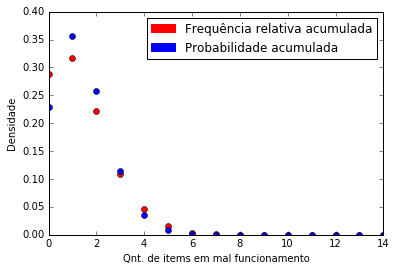

In [144]:
lista_num = range(0,15)
lista_prob = []
for i in range(15):
    if i in range (0,9):
        lista_prob.append(prob[i])
    else:
        lista_prob.append(0)
    

plt.plot(lista_num, lista_prob, 'ro')
plt.plot(lista_num, bino_lista, 'bo')

red_patch = mpatches.Patch(color='red', label='Frequência relativa acumulada')
blue_patch = mpatches.Patch(color='blue', label='Probabilidade acumulada')
plt.legend(handles=[red_patch, blue_patch])

plt.ylabel('Densidade')
plt.xlabel('Qnt. de items em mal funcionamento')

plt.show()

## E

##### Com o modelo probabilístico pode-se, além de analisar resultados, entender como se comporta o sistema, possibilitando a previsão de um comportamento futuro.

## F

In [168]:
pop = carros[(carros.Tipo==1)&(carros.Quantidade>=0)]

In [181]:
contagem = pop.Quantidade.value_counts()
prob2 = pop.Quantidade.value_counts(True)

In [182]:
lista_prob2=[]

for i in range (0,15):
    if i in range (0,9):
        lista_prob2.append(prob2[i])
    else:
        lista_prob2.append(0)

In [183]:
n = 14
p = 0.10
y = pop.Quantidade
bino2_lista = []

for i in range (0,15):
    bino = stats.binom.pmf(i, n ,p)
    bino2_lista.append(bino)
    print ('A probabilidade de ',i, 'é: ', bino)

A probabilidade de  0 é:  0.22876792455
A probabilidade de  1 é:  0.355861215966
A probabilidade de  2 é:  0.257010878198
A probabilidade de  3 é:  0.114227056977
A probabilidade de  4 é:  0.034902711854
A probabilidade de  5 é:  0.00775615818978
A probabilidade de  6 é:  0.00129269303163
A probabilidade de  7 é:  0.00016415149608
A probabilidade de  8 é:  1.595917323e-05
A probabilidade de  9 é:  1.18216098e-06
A probabilidade de  10 é:  6.567561e-08
A probabilidade de  11 é:  2.65356e-09
A probabilidade de  12 é:  7.371e-11
A probabilidade de  13 é:  1.26e-12
A probabilidade de  14 é:  1e-14


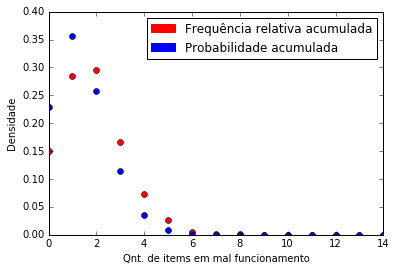

In [185]:
lista_num = range(0,15)
lista_prob = []
for i in range(15):
    if i in range (0,9):
        lista_prob.append(prob[i])
    else:
        lista_prob.append(0)
    

plt.plot(lista_num, lista_prob2, 'ro')
plt.plot(lista_num, bino2_lista, 'bo')

red_patch = mpatches.Patch(color='red', label='Frequência relativa acumulada')
blue_patch = mpatches.Patch(color='blue', label='Probabilidade acumulada')
plt.legend(handles=[red_patch, blue_patch])

plt.ylabel('Densidade')
plt.xlabel('Qnt. de items em mal funcionamento')

plt.show()

#### Podemos ajustar a variável nos mesmo parâmetros pois os resultados apenas dos carros populares foram similares aos resultados gerais (formato do gráfico, probs).